In [63]:
#pip install umap-learn

In [64]:
import umap
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [81]:
df = pd.read_csv('~/Documents/Vu/data/HumanOvarianCancerPatient2Slice2_cell_by_gene.csv')

print(df)

        cell  PDK4  CCL26  CX3CL1  CD4  SNAI2  TNFRSF17  ICAM3  TBX21  FAP  \
0          0   0.0    0.0     0.0  0.0    0.0       0.0    0.0    0.0  0.0   
1          1   0.0    0.0     0.0  0.0    0.0       0.0    0.0    0.0  0.0   
2          2   0.0    0.0     0.0  0.0    0.0       0.0    0.0    0.0  0.0   
3          3   0.0    0.0     1.0  0.0    0.0       1.0    0.0    0.0  0.0   
4          4   0.0    0.0     0.0  0.0    0.0       0.0    0.0    0.0  0.0   
...      ...   ...    ...     ...  ...    ...       ...    ...    ...  ...   
71376  71376   1.0    0.0     0.0  0.0    1.0       0.0    1.0    0.0  0.0   
71377  71377   0.0    0.0     0.0  0.0    0.0       1.0    0.0    0.0  0.0   
71378  71378   0.0    0.0     2.0  0.0    0.0       0.0    0.0    0.0  0.0   
71379  71379   0.0    0.0     0.0  0.0    0.0       0.0    1.0    0.0  0.0   
71380  71380   0.0    0.0     0.0  0.0    0.0       0.0    0.0    0.0  0.0   

       ...  Blank-20  Blank-31  Blank-34  CXCR5  IL21  Blank-17

In [82]:
# df.drop(df.loc[:, 'Blank-8':'Blank-24'].columns, inplace=True, axis=1)
# display 
# print("\nCSV Data after deleting the column 'year':\n")
# print(df)

In [83]:
df.loc[:, df.columns[1:15]] # afficher tous les lignes et 15 colonnes

,PDK4,CCL26,CX3CL1,CD4,SNAI2,TNFRSF17,ICAM3,TBX21,FAP,NFKB2,LAG3,TGFBR3,MMP11,XBP1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71376,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
71377,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,5.0
71378,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
71379,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0


In [84]:
df.loc[1:3][1:550] # afficher 2 lignes et tous les colonnes

,cell,PDK4,CCL26,CX3CL1,CD4,SNAI2,TNFRSF17,ICAM3,TBX21,FAP,...,Blank-20,Blank-31,Blank-34,CXCR5,IL21,Blank-17,Blank-29,Blank-32,Blank-46,Blank-24
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
df.loc[1]

cell        1.0
PDK4        0.0
CCL26       0.0
CX3CL1      0.0
CD4         0.0
           ... 
Blank-17    0.0
Blank-29    0.0
Blank-32    0.0
Blank-46    0.0
Blank-24    0.0
Name: 1, Length: 551, dtype: float64

In [86]:
moyenne_cellule_par_gens = df.loc[:, df.columns[1:]].mean()
moyenne_cellule_par_gens[0]

0.29548479287205276

In [87]:
max_cellule_par_gens = df.loc[:, df.columns[1:]].max()
min_cellule_par_gens = df.loc[:, df.columns[1:]].min()
print(max_cellule_par_gens)
print(min_cellule_par_gens)

PDK4        26.0
CCL26        9.0
CX3CL1      62.0
CD4         19.0
SNAI2       15.0
            ... 
Blank-17     3.0
Blank-29     3.0
Blank-32     2.0
Blank-46     2.0
Blank-24     2.0
Length: 550, dtype: float64
PDK4        0.0
CCL26       0.0
CX3CL1      0.0
CD4         0.0
SNAI2       0.0
           ... 
Blank-17    0.0
Blank-29    0.0
Blank-32    0.0
Blank-46    0.0
Blank-24    0.0
Length: 550, dtype: float64


In [88]:
statistique = pd.DataFrame({'Min_cell':min_cellule_par_gens ,
                   'Max_cell':max_cellule_par_gens ,
                   'Mean_cell': moyenne_cellule_par_gens})
print('Il y a ' + str(df.shape[0]) + ' de cellules et ' + str(df.shape[1]-1) + ' de gens')
print('-----------------------------------------------------')
print('Tableau de min, max, moyenne des gens qui représente dans le cellule')
statistique

Il y a 71381 de cellules et 550 de gens
-----------------------------------------------------
Tableau de min, max, moyenne des gens qui représente dans le cellule


,Min_cell,Max_cell,Mean_cell
PDK4,0.0,26.0,0.295485
CCL26,0.0,9.0,0.043177
CX3CL1,0.0,62.0,0.350696
CD4,0.0,19.0,0.121741
SNAI2,0.0,15.0,0.235875
...,...,...,...
Blank-17,0.0,3.0,0.021799
Blank-29,0.0,3.0,0.021294
Blank-32,0.0,2.0,0.011446
Blank-46,0.0,2.0,0.012608


In [89]:
statistique.to_csv('statistique_gens_par_cellule.csv', index = True)

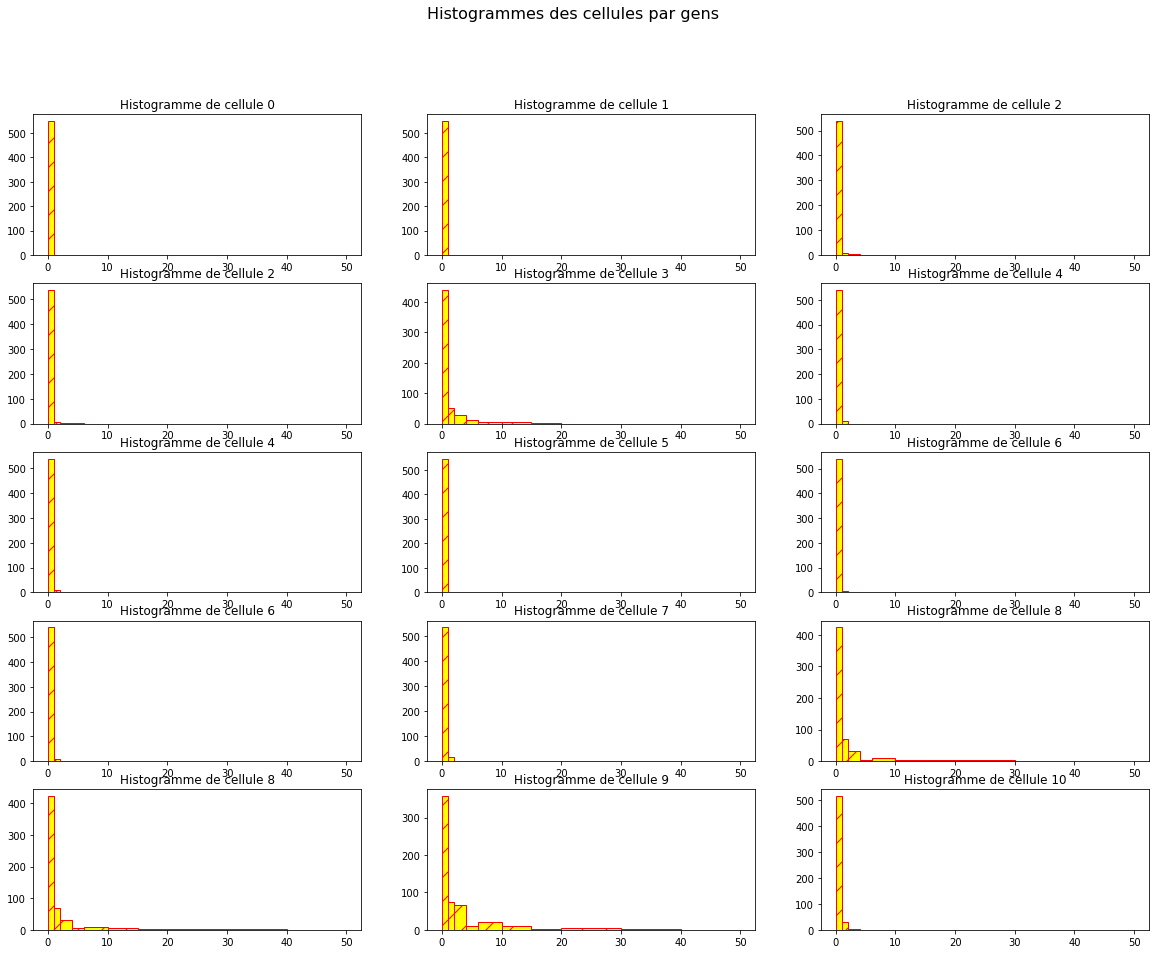

In [90]:
nb_rows = 5
nb_cols = 3

fig, axs = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(20, 15))
plt.suptitle('Histogrammes des cellules par gens', fontsize=16)

j = 0
for i in range(nb_rows):
  for j in range(nb_cols):
    liste_cells = df.loc[i*2+j][1:550]
    max_cell = liste_cells.max()
    axs[i,j].hist(liste_cells, range=(0,max_cell), bins=[0,1,2,4,6,10,15,20,30,40,50], color = 'yellow',
              edgecolor = 'red', hatch = '/')
    axs[i,j].set_title('Histogramme de cellule ' + str(i*2+j))

plt.show()




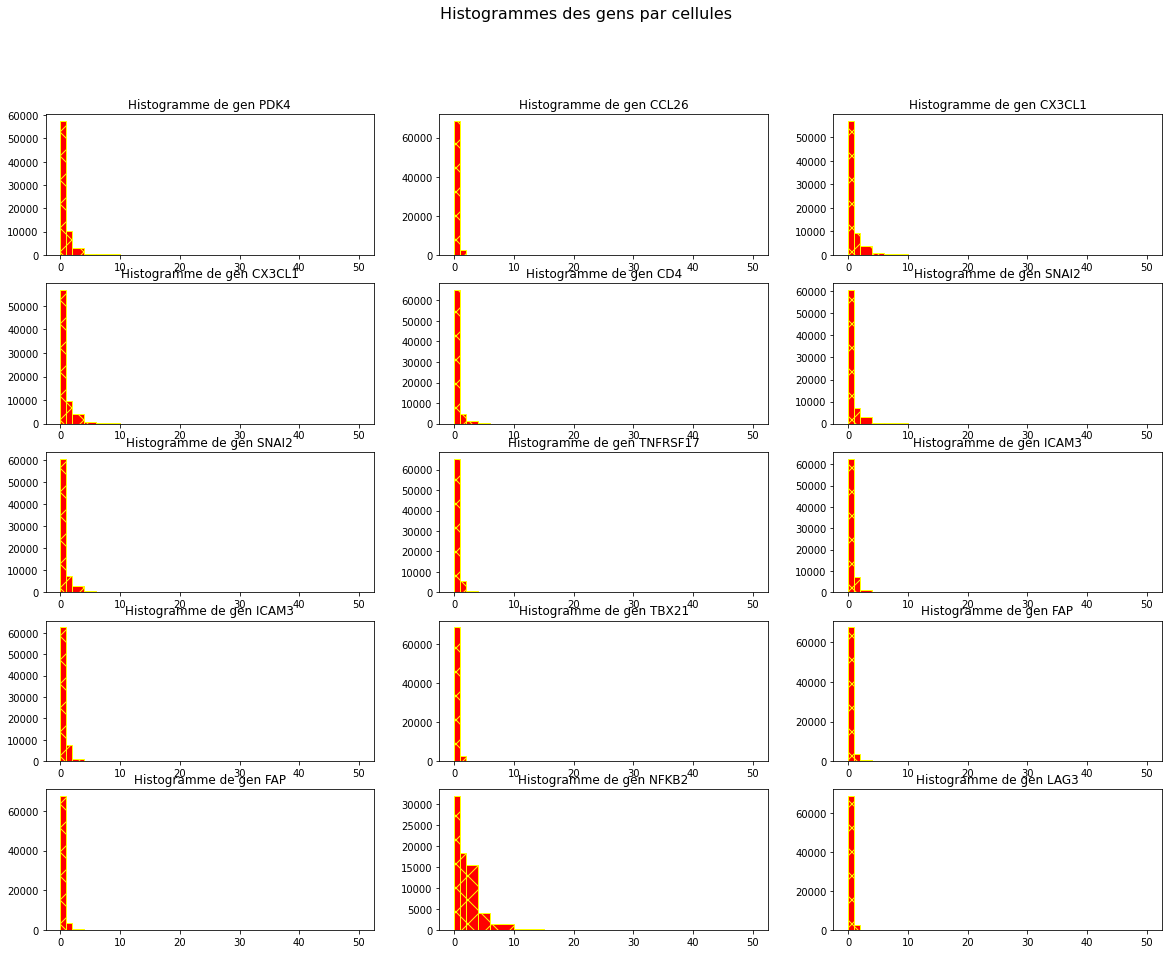

In [91]:
nb_rows = 5
nb_cols = 3

fig, axs = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(20, 15))
plt.suptitle('Histogrammes des gens par cellules', fontsize=16)

j = 0
for i in range(nb_rows):
  for j in range(nb_cols):
    liste_gens = df.loc[:, df.columns[i*2+j+1]]
    max_gen = liste_gens.max()
    axs[i,j].hist(liste_gens, range=(0,max_gen), bins=[0,1,2,4,6,10,15,20,30,40,50], color = 'red',
              edgecolor = 'yellow', hatch = 'x')
    axs[i,j].set_title('Histogramme de gen ' + df.columns[i*2+j+1])

plt.show()

In [92]:
reducer = umap.UMAP(n_neighbors=3, min_dist=0.1)
embedding = reducer.fit_transform(df[:40000])
print(embedding.shape)

/home/mouneem/mambaforge/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


(40000, 2)


In [93]:
k = 15  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(embedding)



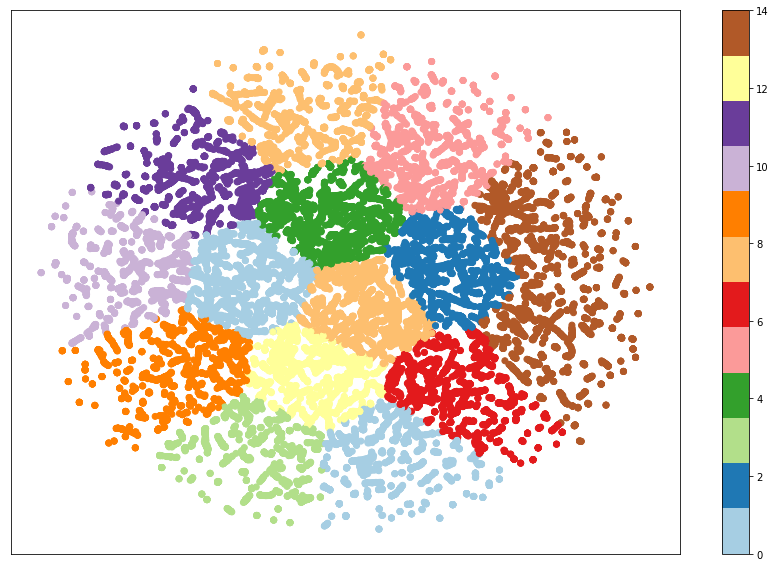

In [94]:
# Affichage des résultats
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Paired')
plt.setp(ax, xticks=[], yticks=[])
plt.colorbar()
plt.show()